<a href="https://colab.research.google.com/github/NikhilDPujari/Machine-Learning/blob/main/EDA_Chronic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.dtypes

,0
age,float64
blood_pressure,float64
specific_gravity,float64
albumin,float64
sugar,float64
red_blood_cells,object
pus_cell,object
pus_cell_clumps,object
bacteria,object
blood_glucose_random,float64


In [ ]:
df.packed_cell_volume

,packed_cell_volume
0,44
1,38
2,31
3,32
4,35
...,...
395,47
396,54
397,49
398,51


In [ ]:
df.packed_cell_volume.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
df.packed_cell_volume=pd.to_numeric(df.packed_cell_volume, errors='coerce') # coerce means ignore the error
df.packed_cell_volume.dtype

dtype('float64')

In [ ]:
df.packed_cell_volume.unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
df.white_blood_cell_count=pd.to_numeric(df.white_blood_cell_count, errors='coerce')

In [ ]:
df.white_blood_cell_count.dtype

dtype('float64')

In [ ]:
df.red_blood_cell_count= pd.to_numeric(df.red_blood_cell_count, errors= 'coerce')
df.red_blood_cell_count.dtype

dtype('float64')

In [ ]:
df.dtypes

,0
age,float64
blood_pressure,float64
specific_gravity,float64
albumin,float64
sugar,float64
red_blood_cells,object
pus_cell,object
pus_cell_clumps,object
bacteria,object
blood_glucose_random,float64


In [ ]:
# seperate columns

cat_cols=[col for col in df.columns if(df[col].dtype == 'object')]

In [ ]:
num_cols=[col for col in df.columns if(df[col].dtype != 'object')]

In [ ]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
for col in cat_cols:
  print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
df.diabetes_mellitus.replace(to_replace={' yes':'yes', '\tyes':'yes', '\tno':'no'}, inplace=True)

In [ ]:
df.diabetes_mellitus.unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df.coronary_artery_disease.replace(to_replace='\tno', value='no', inplace=True)

In [ ]:
df.coronary_artery_disease.unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df['class']=df['class'].map({'ckd':1, 'notckd':0, 'ckd\t':1})

In [ ]:
df['class'].unique()

array([1, 0])

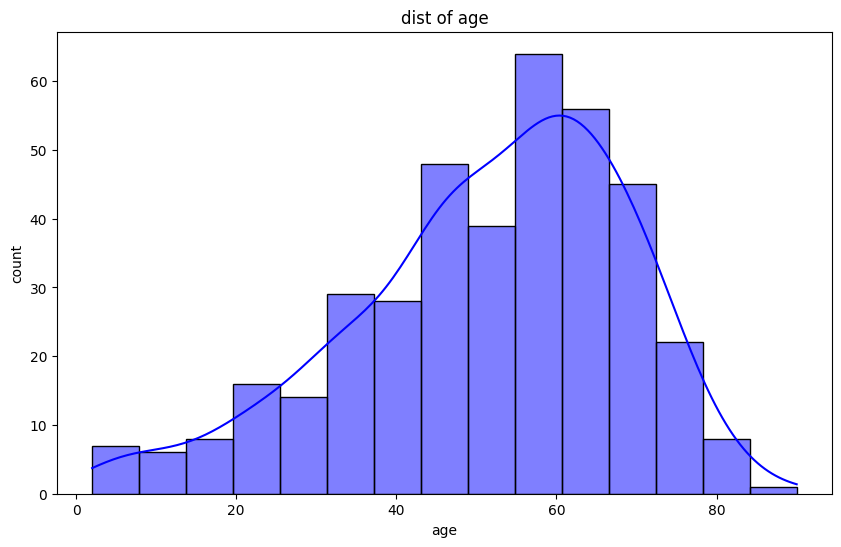

In [ ]:
# Univariate analysis

plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), kde=True, color='blue')
plt.title('dist of age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

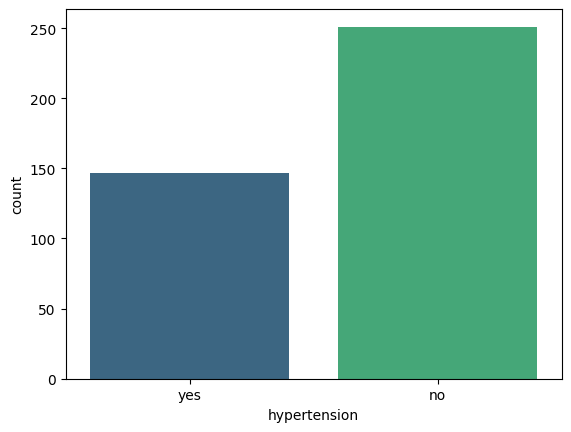

In [ ]:
sns.countplot(x='hypertension', data=df, palette='viridis')

<Axes: xlabel='class', ylabel='blood_urea'>

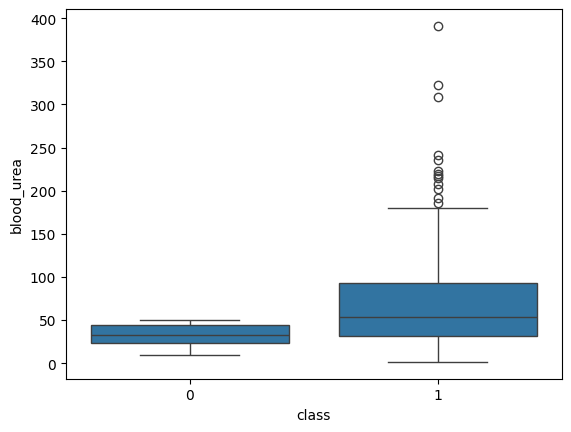

In [ ]:
sns.boxplot(x= 'class', data=df, y='blood_urea')

<Axes: xlabel='class', ylabel='serum_creatinine'>

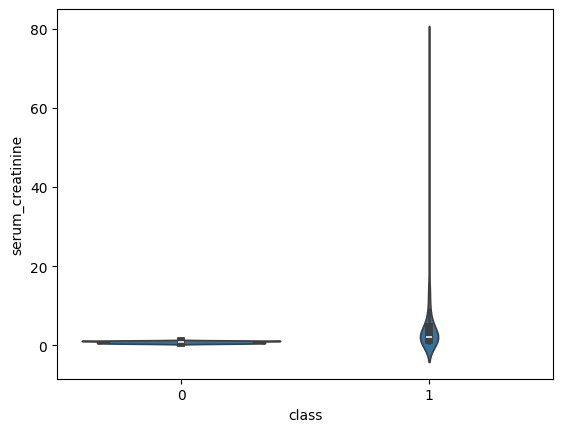

In [ ]:
sns.violinplot(x='class', data=df, y='serum_creatinine')

<Axes: xlabel='aanemia', ylabel='count'>

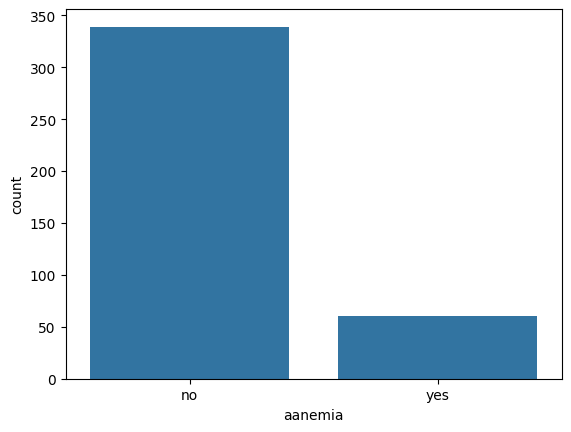

In [ ]:
sns.countplot(x='aanemia', data=df)

<Axes: ylabel='count'>

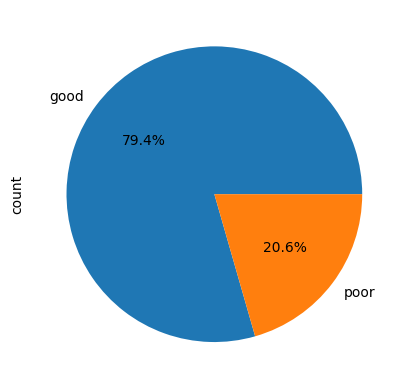

In [ ]:
df.appetite.value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
df.pus_cell_clumps

,pus_cell_clumps
0,notpresent
1,notpresent
2,notpresent
3,present
4,notpresent
...,...
395,notpresent
396,notpresent
397,notpresent
398,notpresent


<Axes: xlabel='pus_cell_clumps', ylabel='count'>

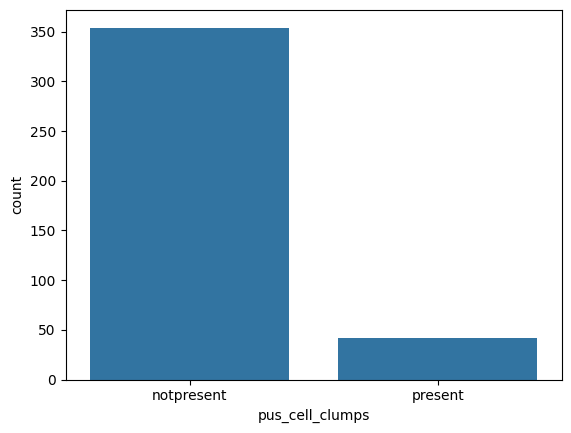

In [ ]:
sns.countplot(x='pus_cell_clumps', data=df)

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

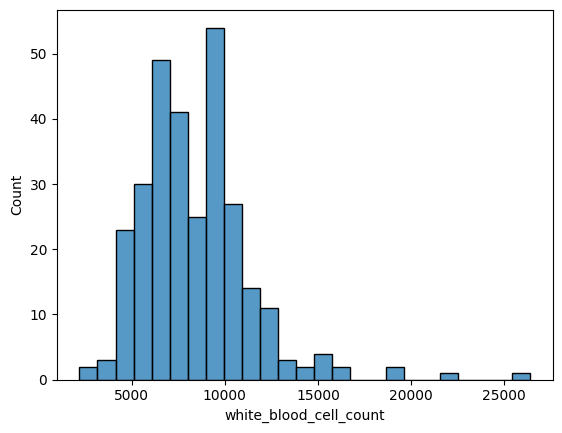

In [ ]:
sns.histplot(df.white_blood_cell_count.dropna())

In [ ]:
# donut plot

df.diabetes_mellitus

,diabetes_mellitus
0,yes
1,no
2,yes
3,no
4,no
...,...
395,no
396,no
397,no
398,no


<Axes: ylabel='count'>

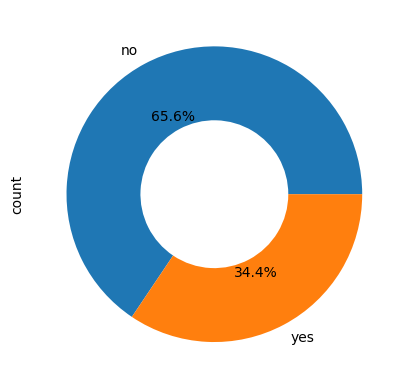

In [ ]:
df.diabetes_mellitus.value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.5))

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

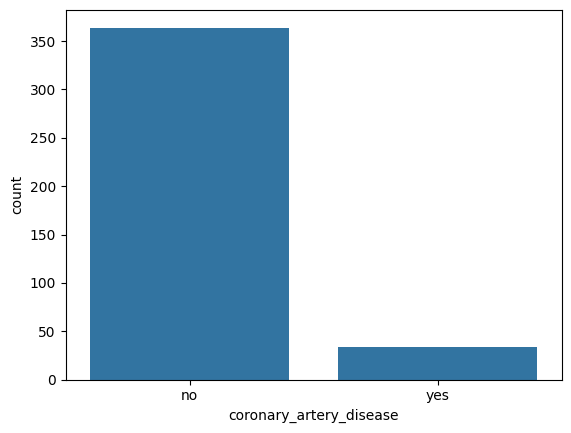

In [ ]:
sns.countplot(x='coronary_artery_disease', data=df)

<Axes: xlabel='peda_edema', ylabel='count'>

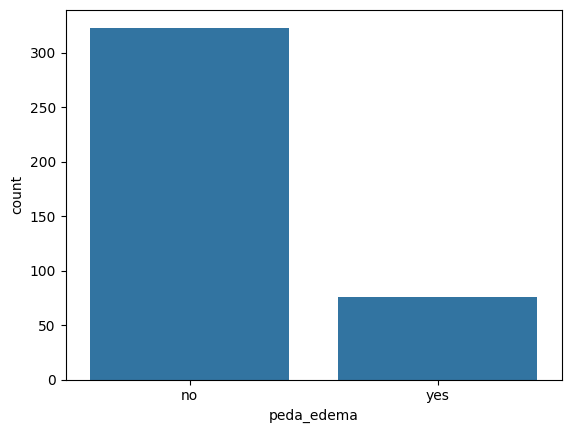

In [ ]:
sns.countplot(x='peda_edema', data=df)

<Axes: xlabel='bacteria', ylabel='count'>

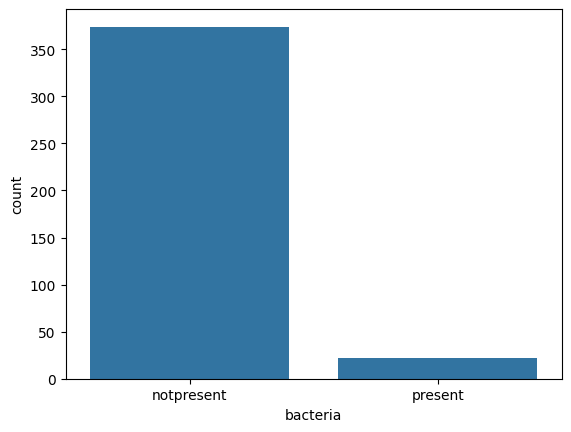

In [ ]:
sns.countplot(x='bacteria', data=df)

<Axes: xlabel='age', ylabel='blood_pressure'>

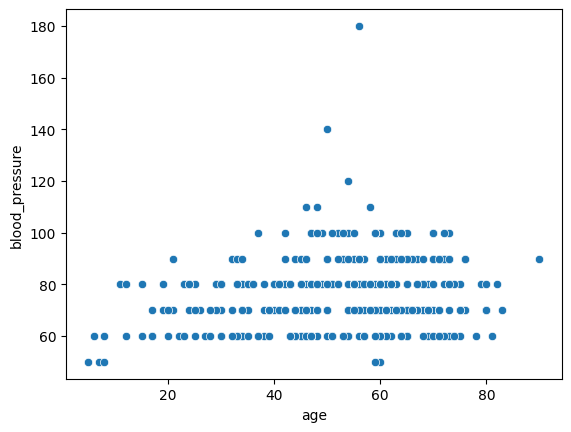

In [ ]:
# bivariate analysis
sns.scatterplot(x='age', y='blood_pressure', data=df)

<Axes: xlabel='age', ylabel='blood_pressure'>

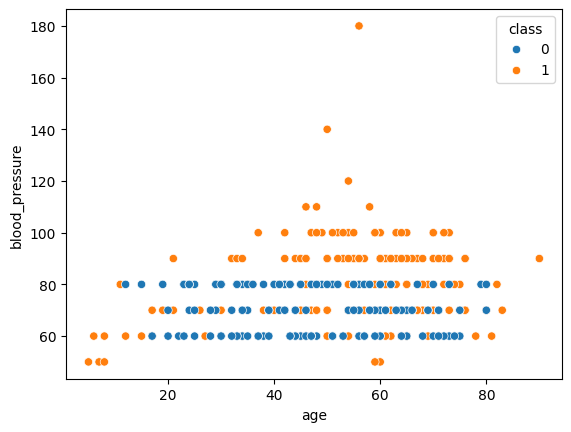

In [ ]:
sns.scatterplot(x='age', y='blood_pressure', data=df, hue='class')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

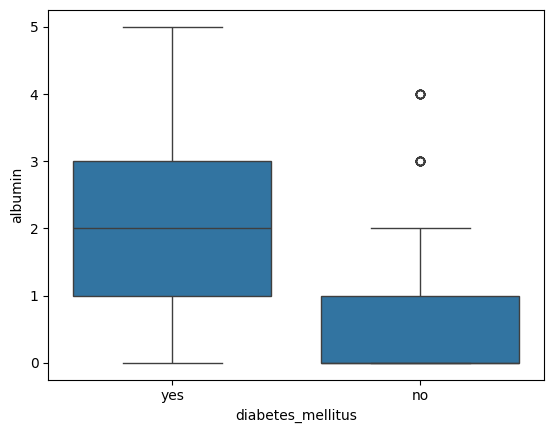

In [ ]:
sns.boxplot(x='diabetes_mellitus', y='albumin', data=df)

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

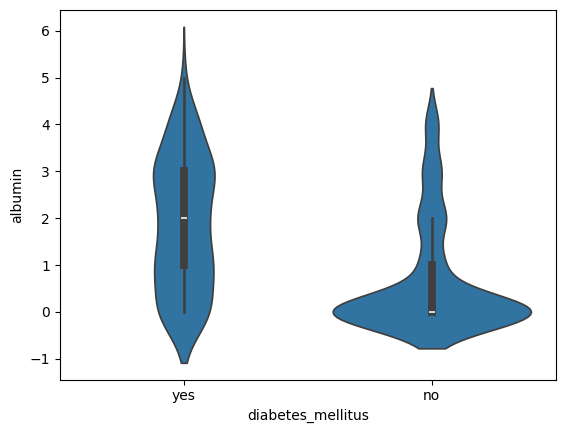

In [ ]:
sns.violinplot(x='diabetes_mellitus', y='albumin', data=df)

<Axes: xlabel='diabetes_mellitus'>

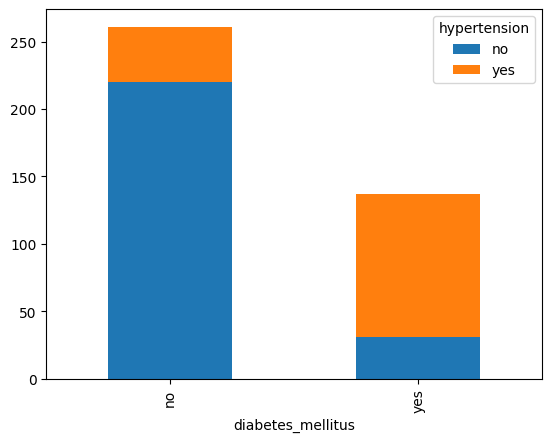

In [ ]:
# stacked bar chart
diabetes_mellitus=pd.crosstab(df.diabetes_mellitus, df.hypertension)
diabetes_mellitus.plot(kind='bar', stacked=True)

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
# multivariate analysis
col=['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
df[col]

,age,blood_pressure,blood_glucose_random,serum_creatinine,class
0,48.0,80.0,121.0,1.2,1
1,7.0,50.0,NaN,0.8,1
2,62.0,80.0,423.0,1.8,1
3,48.0,70.0,117.0,3.8,1
4,51.0,80.0,106.0,1.4,1
...,...,...,...,...,...
395,55.0,80.0,140.0,0.5,0
396,42.0,70.0,75.0,1.2,0
397,12.0,80.0,100.0,0.6,0
398,17.0,60.0,114.0,1.0,0


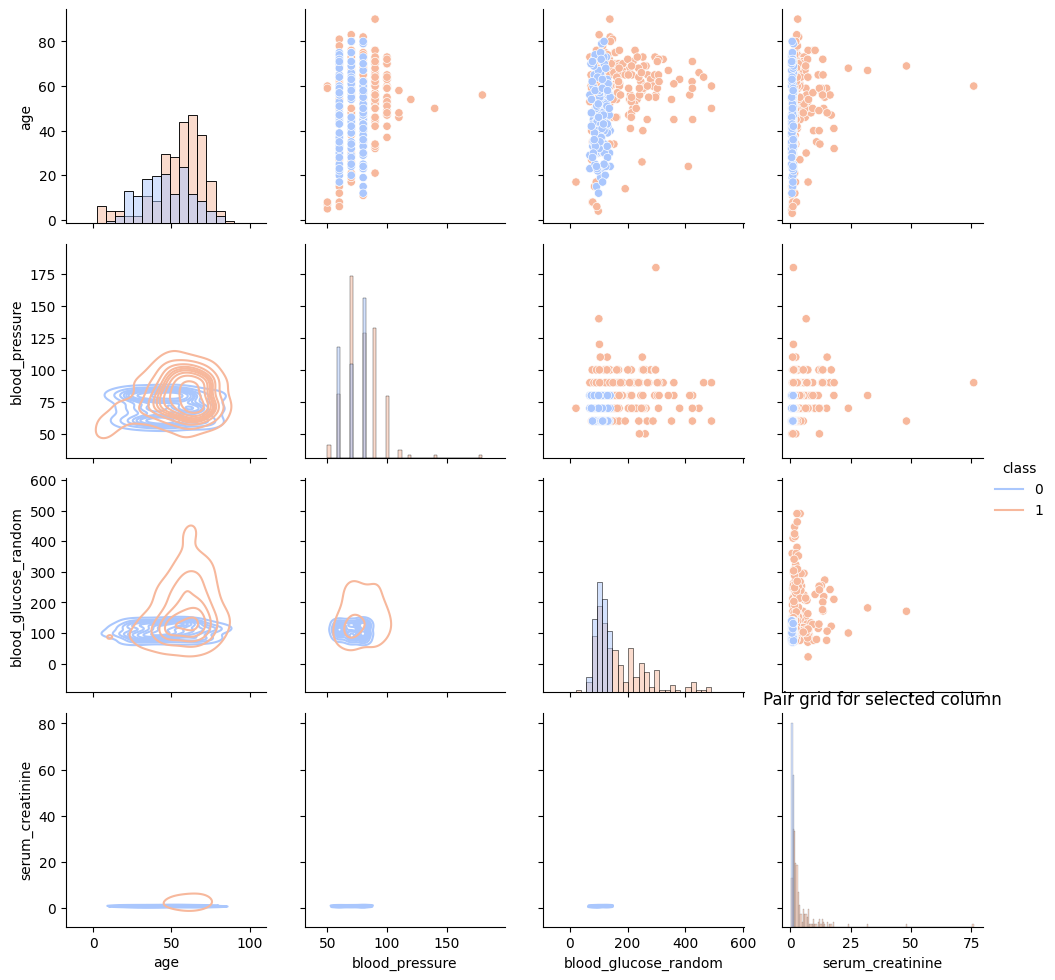

In [ ]:
g=sns.PairGrid(df[col], hue='class', palette='coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.title('Pair grid for selected column')
plt.show()

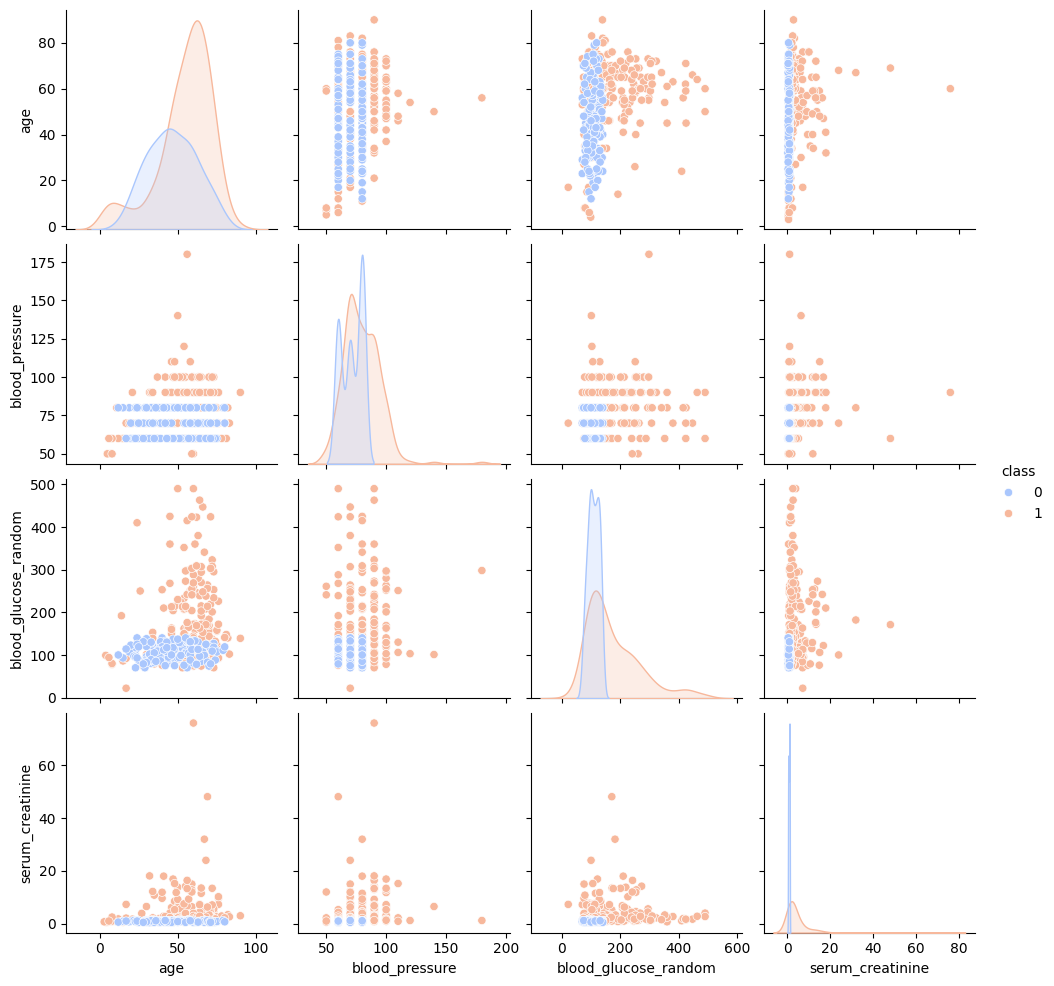

In [ ]:
sns.pairplot(df[col], hue='class', palette='coolwarm')

In [ ]:
df.corr(numeric_only=True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


<Axes: >

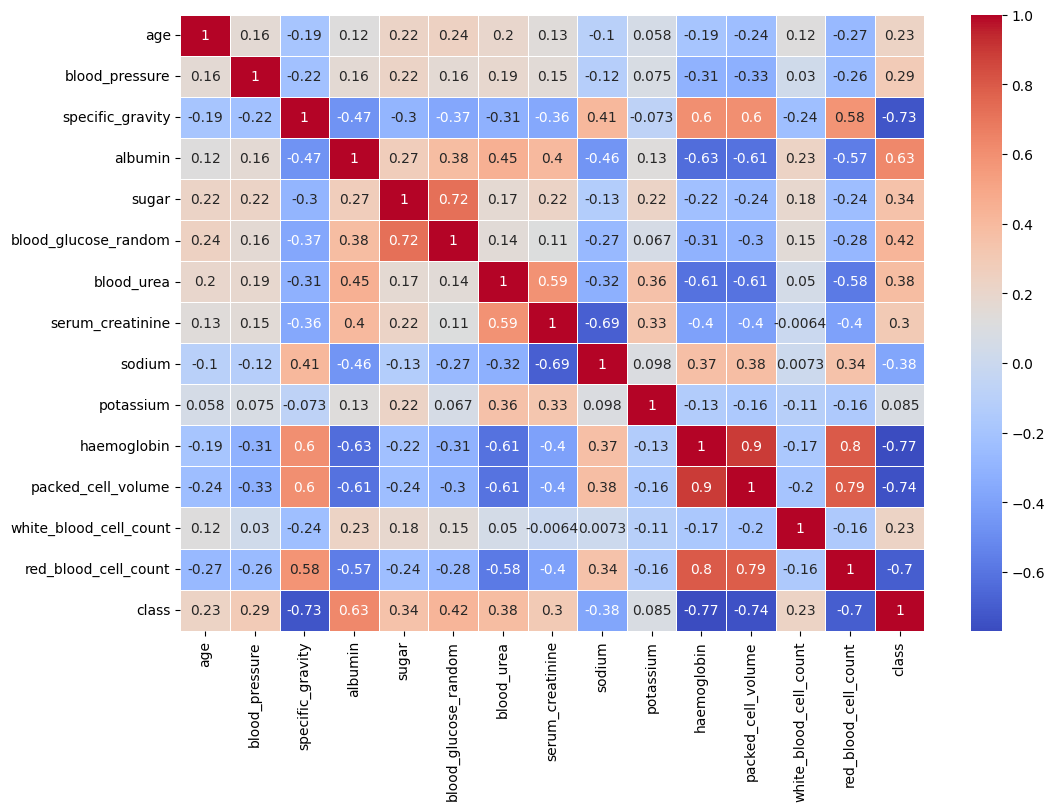

In [ ]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

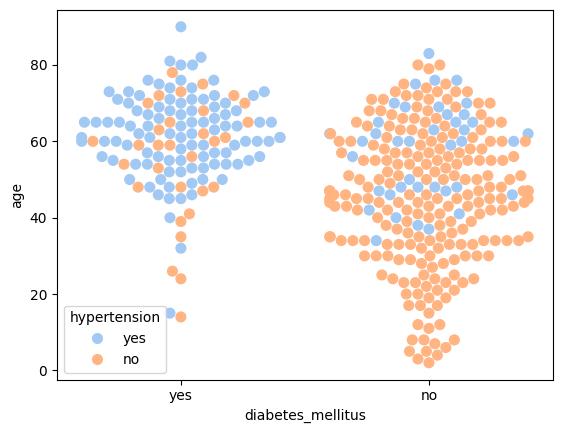

In [ ]:
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='pastel', size=8)

In [ ]:
fig=px.scatter(df, x='age', y='blood_pressure', color='class')
fig.show()

In [ ]:
fig=px.scatter(df, x='age', y='blood_pressure', color='class', hover_data=['serum_creatinine', 'haemoglobin'])
fig.show()

In [ ]:
px.scatter_3d(df, x='age', y='blood_pressure', z='red_blood_cell_count', color='class')

In [ ]:
import plotly.graph_objects as go
data_corr=df.corr(numeric_only=True)
fig=go.Figure(data= go.Heatmap(z=data_corr.values, x= data_corr.columns, y=data_corr.index))
fig.show()

In [ ]:
df.isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,44


In [ ]:
# replace with median
median_values=df[num_cols].median()

In [ ]:
df[num_cols]=df[num_cols].fillna(median_values)

In [ ]:
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [ ]:
mode_values=df.mode().iloc[0]

In [ ]:
df[cat_cols].fillna(mode_values)

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,1
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,1
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,1
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,1
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,0
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,0
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,0
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,0


In [ ]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [ ]:
df[cat_cols]=df[cat_cols].fillna(mode_values)

In [ ]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


In [ ]:
# few columns are object columns >> convert object columns to numerical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
  df[col]=le.fit_transform(df[col])